<a href="https://colab.research.google.com/github/bluepeach1121/CNN_Model_MNIST/blob/main/CNN_MNIST_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

my first time building a model by myself... I would be attempting to achieve 88% accuracy on the MNIST dataset.
The MNIST dataset (Modified National Institute of Standards and Technology dataset) is a large database of handwritten digits.

#1.getting the MNIST dataset and going thru the data 😱😱😱😱

In [73]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt #for visualization
import pandas as pd


from tqdm.auto import tqdm #for progress bar, you'll see



In [ ]:
#setting up of training and testing data
train_data = datasets.MNIST(
    root='data', #where data is downloaded to.
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), # converts a PIL image to tensor array
    target_transform=None #we arent applying any transforms to the labels
    )

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

In [14]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [15]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [25]:
labels = train_data.targets
labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [24]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [19]:
print(f'image-shape: {image.shape}---> [color-channels, height, width]')
print(f'image label: {classes[label]}')

image-shape: torch.Size([1, 28, 28])---> [color-channels, height, width]
image label: 5 - five


#2.visualizin our data 👇👇👇

lets see what's contained in the data

In [18]:
print(f'the image shape is: {image.shape} ')


the image shape is: torch.Size([1, 28, 28]) 


Text(0.5, 1.0, '5 - five')

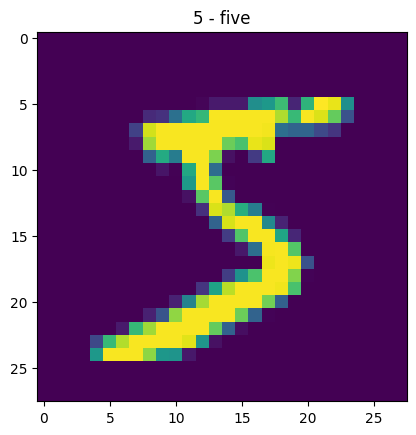

In [20]:
image, label =train_data[0]
plt.imshow(image.squeeze())
plt.title(classes[label])
#image

#### in order for moi to conserve compuattional power (i dont have a gpu and im not paying for google colab's gpu), I'll have to work this image in greyscale... 😑😑😑

(-0.5, 27.5, 27.5, -0.5)

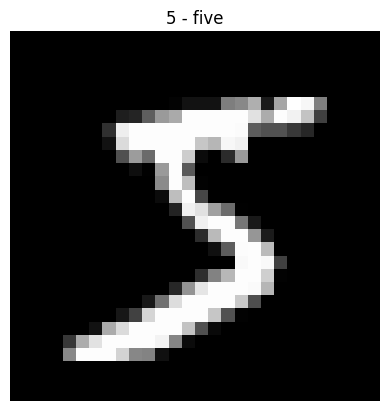

In [21]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(classes[label]);
plt.axis(False)

In [ ]:
#plot random images.... manual seed is set to 42 to ensure consistency across devices
torch.manual_seed(42)
fig = plt.figure(figsize=(10,12))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(classes[label])
    plt.axis(False);

In [ ]:
# the first 16 images in the dataset and their corresponding labels
fig = plt.figure(figsize=(10, 12))
rows, cols = 4, 4

# Loop over the first 16 images
for i in range(1, rows*cols+1):
    img, label = train_data[i-1]  # Get the image and label from the dataset
    fig.add_subplot(rows, cols, i)  #
    plt.imshow(img.squeeze(), cmap='gray')  # Display the image in grayscale
    plt.title(classes[label])  # Set the title to the class name
    plt.axis(False)

#3.preparin' dataloader

why do we need the dataloader: the Dataloader turns our dataset into a python iterable... and also I want to breakup this data into minibatches.. it's more computationally efficient to go thru data in batches than at one.
yh,

---

and also, It gives the neural network more chances to learn.
(❁´◡`❁)👍👍👍

In [29]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

#turn datasets into batches (iterables)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a2665fba980>,
 <torch.utils.data.dataloader.DataLoader at 0x7a2665fb8a90>)

In [30]:
print(f'DataLoaders are loacated at: {train_dataloader, test_dataloader}')
print(f'length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}....')
print(f'length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}.....')

DataLoaders are loacated at: (<torch.utils.data.dataloader.DataLoader object at 0x7a2665fba980>, <torch.utils.data.dataloader.DataLoader object at 0x7a2665fb8a90>)
length of train_dataloader: 1875 batches of 32....
length of test_dataloader: 313 batches of 32.....


In [31]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [32]:
len(train_features_batch), len(train_labels_batch)

(32, 32)

image size: torch.Size([1, 28, 28])
label: 1, label size: torch.Size([])


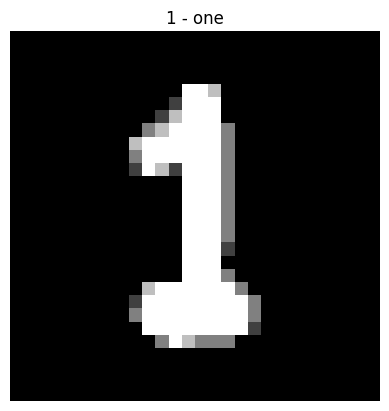

In [34]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(classes[label])
plt.axis(False)
print(f'image size: {img.shape}')
print(f'label: {label}, label size: {label.shape}')

In [35]:
import requests
from pathlib import Path as path

#download helper functions from learn pytorch repo
if path('helper_function.py').is_file():
    print('helper_function.py already exists, skipping download....')
else:
    print('downloading helper_function.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

downloading helper_function.py


In [36]:
#device agnostic code
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

#4.Functionizin' trainin' and evaluation/testin' loops. ➿➿➿➿➿

* training loop --> `train_step()`
* testing loop --> `test_step()`


In [37]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """performs trainin' with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    #put model into training mode
    model.train()

    #add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        #put data on target device
        X, y = X.to(device), y.to(device)

        #1. forward pass
        y_pred = model(X)

        #2. calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) #go from logits -> predcition labels

        #3. optimizer zerp grad
        optimizer.zero_grad()

        #4. loss backward
        loss.backward()

        #5. optimizer step (update the model once per batch)
        optimizer.step()

        #print out whats happening
        if batch % 400 == 0:
            print(f'looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples')

In [38]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """perform a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0

    #put the model in eval mode
    model.eval()

    #turn on inference mode
    with torch.inference_mode():
        for X, y in data_loader:
            #send the data to the target device
            X, y = X.to(device), y.to(device)

            #1. forward pass
            test_pred = model(X)

            #2. calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> predictions

        #adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'test loss {test_loss: .5f} | test acc: {test_acc: 2f}% \n')

In [39]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            accuracy_fn,
            device: torch.device =device):
    """returns a dictionary containing the results of model predicting on data."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #make our data device agnostic
            X, y = X.to(device), y.to(device)
            #make predictions
            y_pred = model(X)

            # accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__, #only works when model was created with a class
            'model_loss': loss.item(),
            'model_acc': acc}

#5.Model 2: building a convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep learning models primarily used for processing and analyzing visual data.

😶‍🌫️😶‍🌫️😶‍🌫️😶‍🌫️😶‍🌫️

In [59]:
#create a convolutional neural network also called CNNs
class CNNmodelMNIST(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            #create a conv layer
            # https://poloclub.github.io/cnn-explainer/
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        ) #W(out) = ((W-kernelsize+(2*padding))/stride) + 1
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        #print(f'Output shape of conv_block_1: {x.shape}')
        x = self.conv_block_2(x)
        #print(f'output shape of conv_block_2: {x.shape}')
        x = self.classifier(x)
        #print(f'output shape of classifier: {x.shape}')
        return x


to understand the 7*7 in line 44 of the CNN model, `nn.Linear(in_features=hidden_unitsx7x7,`, we need to understand the shape of the last tensor than was pass into it, the shape of the last tensor that was passed into into it was [hidden_layer, 7, 7] so when its flattened it becomes hidden_layerx7x7.
note to myself.. when i do nn.flatten, the shape of the next layer has to be changed..

size of `in_features` after flattening --> hidden_layer * size of last layer.

In [60]:
len(classes)

10

In [61]:
torch.manual_seed(42)
model_1 = CNNmodelMNIST(input_shape=1,
                        hidden_units=12,
                        output_shape=len(classes)).to(device)

In [66]:
#random tensor to test model and ensure all shapes match prop'ly
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor = rand_image_tensor.unsqueeze(0)  # Add batch dimension
output = model_1(rand_image_tensor)
print(f'Output shape of conv_block_1: {output.shape}')

Output shape of conv_block_1: torch.Size([1, 10])


In [63]:
model_1(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0132,  0.0381, -0.0023, -0.0256, -0.0155,  0.0145,  0.0144, -0.1220,
          0.0955, -0.0045]], grad_fn=<AddmmBackward0>)

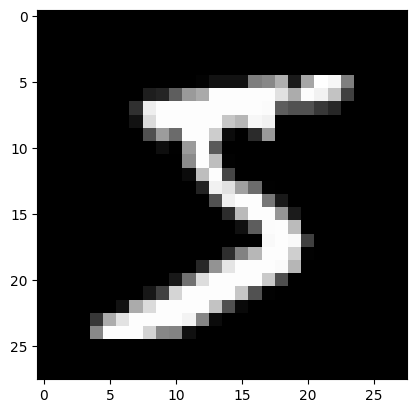

In [64]:
plt.imshow(image.squeeze(), cmap='gray')

#6.performing tests... 🤔🤔
* nn.Conv2d performs the convolution operation on 2-D input data, mostly images. For grayscale images, in_channels is 1. for RGB images, in_channels is 3.
* Max pooling is a downsizingg operation commonly used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions of the feature maps while retaining the most important information.

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'image batch shape: {images.shape}')
print(f'single image shape: {test_image.shape}')
print(f'test image: \n {test_image}')

In [69]:
#LOOKIN' AT THE FUNCTIONALITY OF NN.CONV2d
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([10, 62, 62])

In [70]:
# print out original image shape without unsqueezed dimension
print(f'test image original shape: {test_image.shape}')
#print(f'test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}')

# create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f'shape after going through conv_layer(): {test_image_through_conv.shape}')

#pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'shape after going thru conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

torch.manual_seed(42)
#create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f'\nrandom tensor: \n {random_tensor}')
print(f'\nrandom tensor shape: \n {random_tensor.shape}')


#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax Pool tensor: \n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')

test image original shape: torch.Size([3, 64, 64])
shape after going through conv_layer(): torch.Size([10, 62, 62])
shape after going thru conv_layer() and max_pool_layer(): torch.Size([10, 31, 31])

random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

random tensor shape: 
 torch.Size([1, 1, 2, 2])

Max Pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


#7.setting up a loss and optimizer function for `model_1`

In [72]:
#setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

in the loss and optimzer function above, I used Adam evn though I suspect that SGD might be better.

#8.Trainin' 🏃‍♂️🏃‍♂️🏃‍♂️

In [74]:
%%time
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch}\n``````````````````')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
``````````````````
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
test loss  0.08108 | test acc:  97.533946% 

epoch: 1
``````````````````
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
test loss  0.05027 | test acc:  98.372604% 

epoch: 2
``````````````````
looked at 0 / 60000 samples
looked at 12800 / 60000 samples
looked at 25600 / 60000 samples
looked at 38400 / 60000 samples
looked at 51200 / 60000 samples
test loss  0.04390 | test acc:  98.612220% 

CPU times: user 3min 9s, sys: 919 ms, total: 3min 10s
Wall time: 3min 12s


In [76]:
# get model_1 results
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'CNNmodelMNIST',
 'model_loss': 0.04390186443924904,
 'model_acc': 98.61222044728434}

In [79]:
compare_results = pd.DataFrame([model_1_results])
compare_results

,model_name,model_loss,model_acc
0,CNNmodelMNIST,0.043902,98.61222


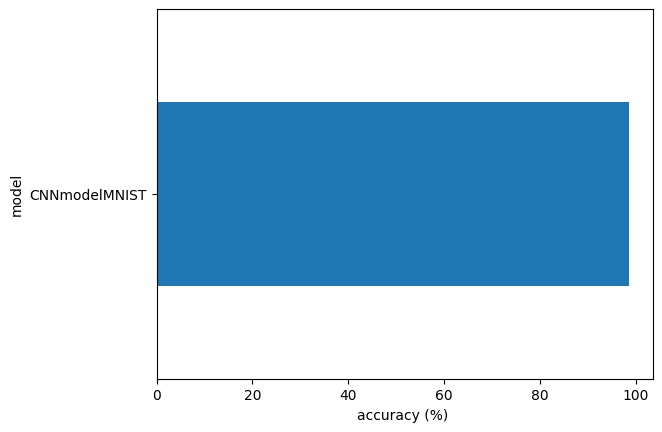

In [81]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%) ")
plt.ylabel('model');

#9. making predictions with test data

In [82]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #forward pass (model outputs raw logits)
            pred_logit = model(sample)

            #get prediction probability (logit -> prediction probabilty)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            #get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    #stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [83]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '0 - zero')

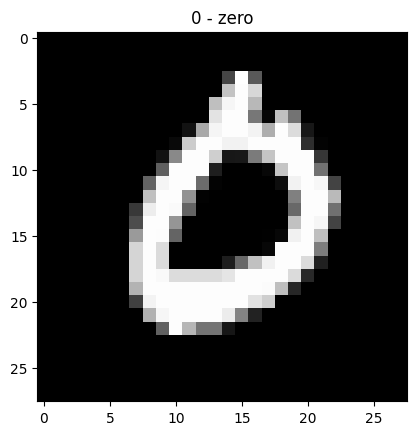

In [84]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [85]:
#make predictions
pred_probs = make_predictions(model=model_1,
                              data=test_samples)

#view first 2 prediction probabilites
pred_probs[:2]

tensor([[9.9998e-01, 3.1929e-13, 5.9425e-07, 3.0140e-10, 1.9869e-07, 6.9578e-09,
         1.7995e-05, 2.1481e-09, 8.4560e-08, 1.5074e-07],
        [3.9310e-09, 4.9526e-11, 1.5554e-04, 9.9984e-01, 3.4549e-13, 1.0134e-08,
         5.4478e-16, 3.5032e-08, 7.3262e-08, 2.1642e-07]])

In [86]:
test_labels


[0, 3, 4, 1, 0, 8, 4, 2, 3]

In [87]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes


tensor([0, 3, 4, 1, 0, 8, 4, 2, 3])

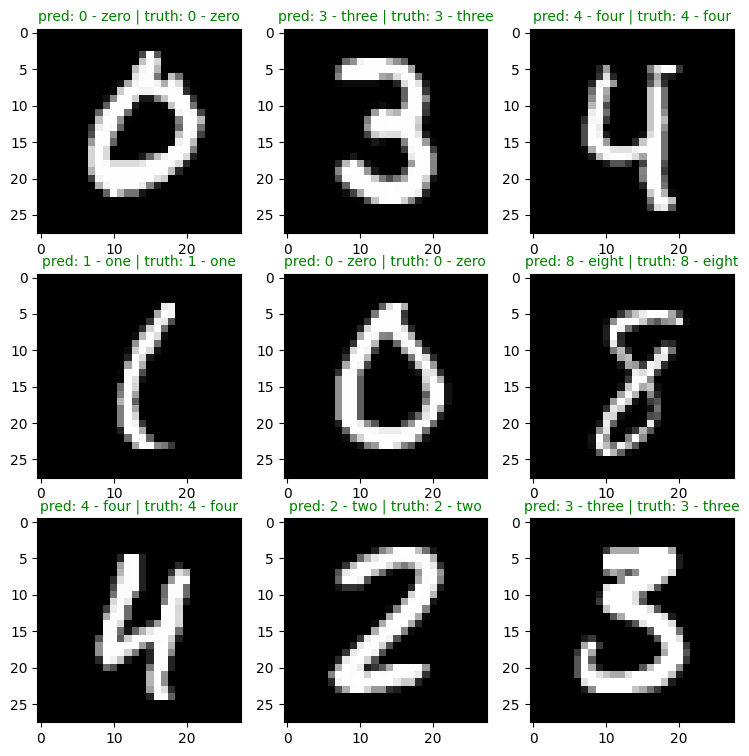

In [91]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    #create subplot
    plt.subplot(nrows, ncols, i+1)

    #plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    #find the prediction (in text form, e.g 'sandal')
    pred_label = classes[pred_classes[i]]

    #get the truth label (in text form)
    truth_label = classes[test_labels[i]]

    #create a title for the plot
    title_text = f'pred: {pred_label} | truth: {truth_label}'

    #check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') #green txt if prediction's same as truth label
    else:
        plt.title(title_text, fontsize=10, c='r')

    #plt.axis(False);


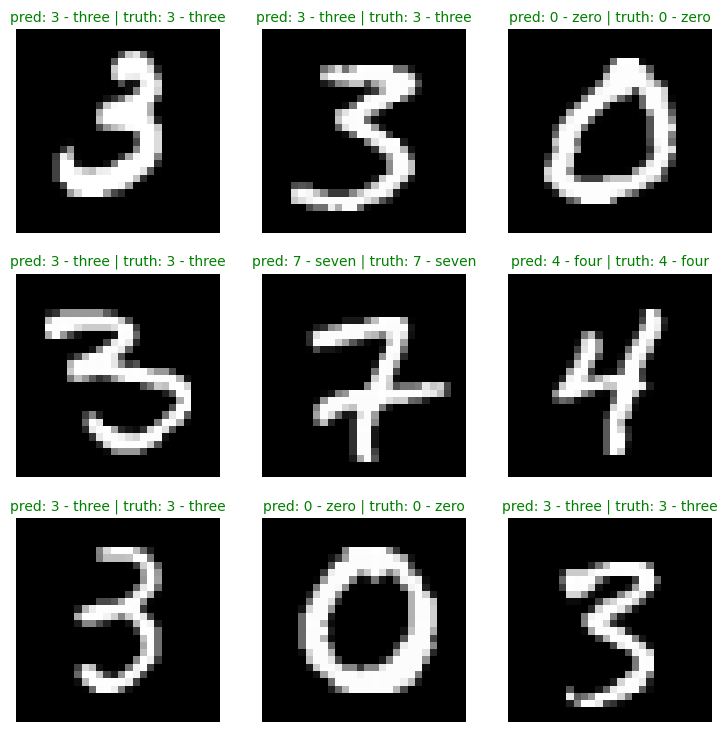

In [123]:
#no seed is set to ensure actual randomness

# Sample 9 random images from the test data, k means keyword arguement
sampled_data = random.sample(list(test_data), k=9)
test_samples = [item[0] for item in sampled_data]
test_labels = [item[1] for item in sampled_data]

test_samples_tensor = torch.stack(test_samples).to(device)
model_1.eval()
with torch.no_grad():
    output = model_1(test_samples_tensor)
pred_classes = output.argmax(dim=1).cpu().numpy()

# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i + 1)

    plt.imshow(sample.squeeze(), cmap='gray')

    pred_label = classes[pred_classes[i]]
    truth_label = classes[test_labels[i]]

    # Create a title for the plot
    title_text = f'pred: {pred_label} | truth: {truth_label}'

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')  # Green text if prediction's same as truth label
    else:
        plt.title(title_text, fontsize=10, c='r')  # Red text if prediction's different from truth label

    plt.axis('off');  # Remove axis



In [98]:
import mlxtend
from torchmetrics import ConfusionMatrix
from tqdm.auto import tqdm

#1. make predictions with trained data
y_preds =[]
model_1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='making prediction....'):
        #send the data and targets to target device
        X, y = X.to(device), y.to(device)
        #do the forward pass
        y_logit = model_1(X)
        #turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

making prediction....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4, 1, 8, 8, 8, 9])

In [99]:
len(y_pred_tensor)


10000

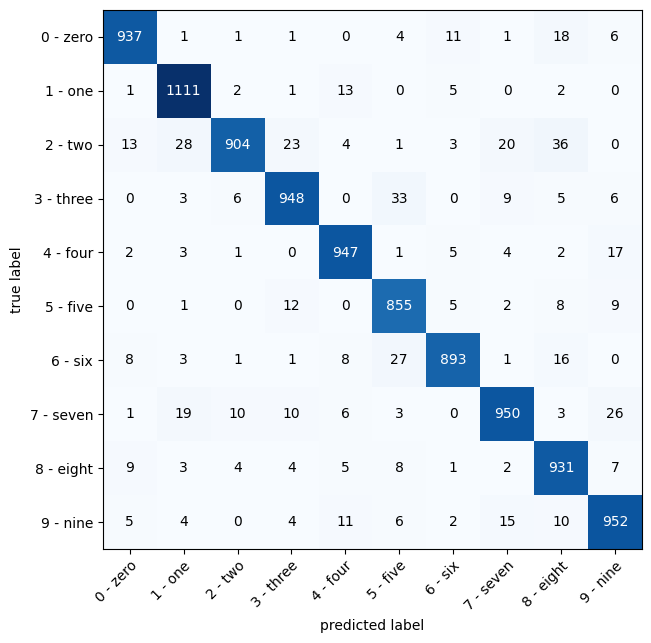

In [100]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(classes))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names=classes,
    figsize=(10, 7)
)

I achieved 98% accuracy which is about 10 % higher than my target... thats awesome.

**SAPARE AUDE**